In [1]:
!pip install alpha_vantage

In [94]:
%matplotlib notebook

In [105]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import requests
import pathlib
from config import api_key

In [106]:
# Your key here
key = api_key
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

# Get the data, returns a tuple
# Get data for Boeing (BA) stock
df, meta_df = ts.get_daily(symbol='cnk', outputsize = "full")
df.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-05-13,13.06,13.08,11.8500,12.18,4119568.0
2020-05-12,13.72,14.00,13.0500,13.08,2281179.0
2020-05-11,14.75,14.78,13.4459,13.58,4176627.0
2020-05-08,13.91,14.13,13.5500,14.13,3418178.0
2020-05-07,13.08,14.16,12.9600,13.61,3506987.0


In [113]:
stock.loc[imp_dates]

,4. close,change
date,,
2020-01-31,33.56,-0.057833
2020-03-13,33.99,-0.045761
2020-03-23,26.34,-0.260528
2020-03-27,30.18,-0.152723
2020-04-16,37.22,0.044919


In [107]:
stock.loc[imp_dates].index

DatetimeIndex(['2020-01-31', '2020-03-13', '2020-03-23', '2020-03-27',
               '2020-04-16'],
              dtype='datetime64[ns]', name='date', freq=None)

In [223]:
def ticker_plot(ticker):
    ticker = ticker.lower()
    df, meta_df = ts.get_daily(symbol=str(ticker), outputsize = "full")

    # Data cleaning
    # Narrow the data to only get stock prices starting on this date
    start_date = "2019-06-01"
    stock=df[df.index >= start_date]

    # Get the stock price on the first day of our range
    stock = stock[["4. close"]]
    start = stock["4. close"][-1]

    # Calculate the %change between the stock price on first day and stock price of each day after
    # Add %change data as a column called "change" in our dataframe
    stock["change"] = stock.apply(lambda x:(x-start)/start)


    # Get the company name given the ticker symbol
    co = requests.get(f"https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={ticker}&apikey={key}").json()
    co_name = co["bestMatches"][0]["2. name"]

    stock_jan=stock[stock.index>='2020-01-31']
#     stock_neg=stock_jan[stock_jan.change<0]
#     stock_pos=stock_jan[stock_jan.change>=0]
    pe_ratio = tst[ticker]
    imp_dates = tst.index
#     imp_dates = [pd.to_datetime('2020-01-31'), pd.to_datetime('2020-03-13'), pd.to_datetime('2020-03-27'), pd.to_datetime('2020-04-16')]
    
    # Visualization: hex color scheme = coolors.co/92374d-8c5383-4a5899-559cad-c1b2ab
    fig, ax=plt.subplots(figsize=(10,4))
    ax2=ax.twinx()
    ax2.scatter(imp_dates, pe_ratio, color='w')
    ax2.set_ylabel("PE Ratio",labelpad=15, rotation=270)
    
    ax.fill_between(stock.index,stock.change, color='gray')
    ax.fill_between(stock_jan.index, stock_jan.change, color='#4169e1')
    ax.fill_between(stock_jan.index,stock_jan.change,where=stock_jan.change<=0, color='#e63946')
    ax.set_facecolor('#03062a')

    ax.axvline(pd.to_datetime('2020-01-31'), color='w', linestyle=':', label = 'Jan 31 - WHO declares COVID-19 as a pandemic')
    ax.axvline(pd.to_datetime('2020-03-13'), color='crimson', linestyle=':', label = 'Mar 13 - Trump declares a national emergency')
#     ax.axvline(pd.to_datetime('2020-03-23'), color='w', linestyle=':', label = 'Mar 23 - NYSE closed')
    ax.axvline(pd.to_datetime('2020-03-27'), color='w', linestyle=':', label = 'Mar 27 - Trump signs stimulus package')
    ax.axvline(pd.to_datetime('2020-04-16'), color='w', linestyle=':', label = 'Apr 16 - Trump issues guidlines to reopen')
    ax.set_title(co_name)
#     ax.legend(loc='lower left')
    ax.set_ylabel(f"% Change in Stock Price")
    fig.savefig(f"../images/{co_name}.png")

<IPython.core.display.Javascript object>


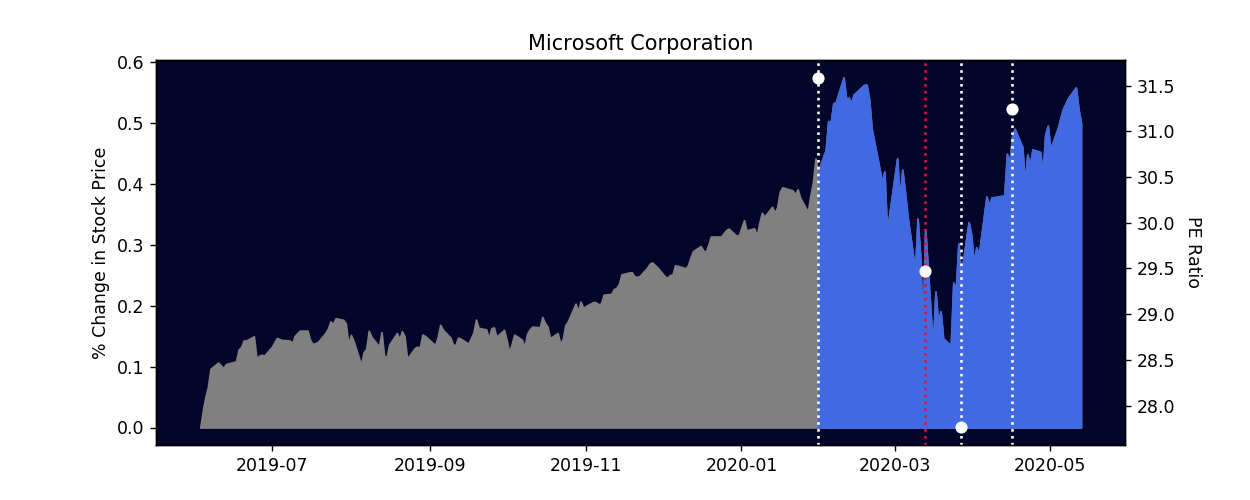

In [245]:
ticker_plot("msft")

In [129]:
filepath = pathlib.Path("pe_data.csv")
pe_df= pd.read_csv(filepath)
pe_df

,Industry,Ticker,Company,Date,PE Ratio
0,Entertainment,NFLX,Netflix,6/28/2019,144.05
1,Entertainment,NFLX,Netflix,9/30/2019,85.50
2,Entertainment,NFLX,Netflix,12/31/2019,78.35
3,Entertainment,NFLX,Netflix,1/31/2020,83.56
4,Entertainment,NFLX,Netflix,3/13/2020,81.43
...,...,...,...,...,...
175,Tech,MSFT,Microsoft,3/13/2020,29.47
176,Tech,MSFT,Microsoft,3/23/2020,25.23
177,Tech,MSFT,Microsoft,3/27/2020,27.77
178,Tech,MSFT,Microsoft,3/31/2020,27.84


In [186]:
co_data = pe_df[pe_df["Ticker"] == "CNK"]
co_data

,Industry,Ticker,Company,Date,PE Ratio,ticker
18,Entertainment,CNK,Cinemark,6/28/2019,16.29,cnk
19,Entertainment,CNK,Cinemark,9/30/2019,17.62,cnk
20,Entertainment,CNK,Cinemark,12/31/2019,16.14,cnk
21,Entertainment,CNK,Cinemark,1/31/2020,15.02,cnk
22,Entertainment,CNK,Cinemark,3/13/2020,7.01,cnk
23,Entertainment,CNK,Cinemark,3/23/2020,5.86,cnk
24,Entertainment,CNK,Cinemark,3/27/2020,5.86,cnk
25,Entertainment,CNK,Cinemark,3/31/2020,4.86,cnk
26,Entertainment,CNK,Cinemark,4/16/2020,5.54,cnk


In [171]:
pe_df['ticker'] = [ticker.lower() for ticker in pe_df['Ticker']]
pe_df

,Industry,Ticker,Company,Date,PE Ratio,ticker
0,Entertainment,NFLX,Netflix,6/28/2019,144.05,nflx
1,Entertainment,NFLX,Netflix,9/30/2019,85.50,nflx
2,Entertainment,NFLX,Netflix,12/31/2019,78.35,nflx
3,Entertainment,NFLX,Netflix,1/31/2020,83.56,nflx
4,Entertainment,NFLX,Netflix,3/13/2020,81.43,nflx
...,...,...,...,...,...,...
175,Tech,MSFT,Microsoft,3/13/2020,29.47,msft
176,Tech,MSFT,Microsoft,3/23/2020,25.23,msft
177,Tech,MSFT,Microsoft,3/27/2020,27.77,msft
178,Tech,MSFT,Microsoft,3/31/2020,27.84,msft


In [203]:
# how to use time.sleep to wait for a loop
import time
for i in range(10):
    print(i)
    time.sleep(5)

0
1
2
3
4
5
6
7
8
9


In [214]:
tick_list = list(pe_df['ticker'].unique())
tick_list

['nflx',
 'atvi',
 'cnk',
 'lyv',
 'amzn',
 'ebay',
 'big',
 'm',
 'tjx',
 'kr',
 'cpb',
 'mcd',
 'jax',
 'stay',
 'ual',
 'mar',
 'clw',
 'clx',
 'tmus',
 'msft']

<IPython.core.display.Javascript object>


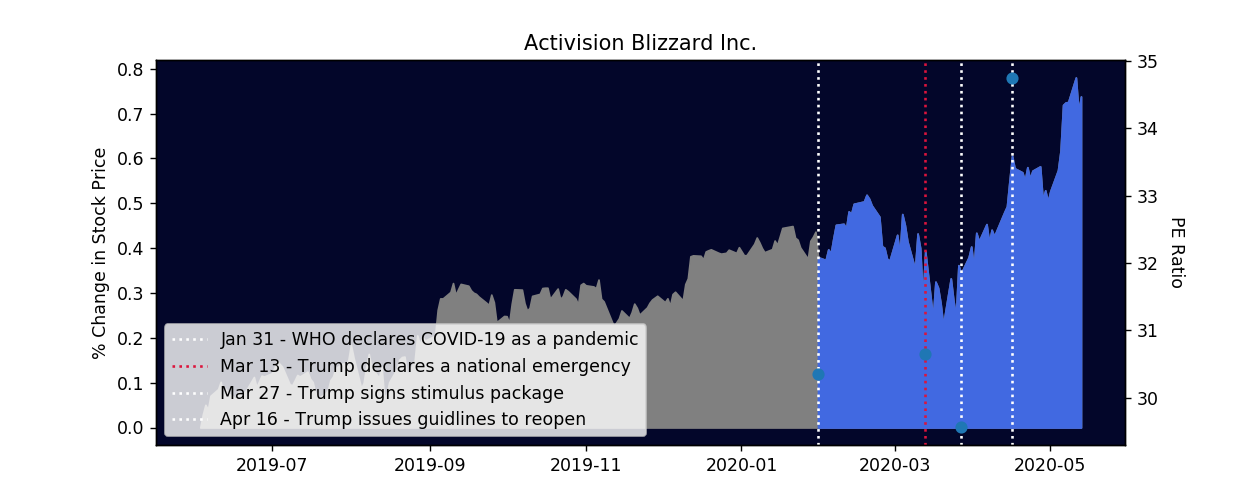

In [217]:
ticker_plot(tick_list[1])

In [198]:
# how to use a for loop to lower the case of the tickers
ticker_list = []
for ticker in pe_df['Ticker']:
    ticker_list.append(ticker.lower())
    
pe_df['ticker2'] = ticker_list
pe_df

,Industry,Ticker,Company,Date,PE Ratio,ticker,ticker2
0,Entertainment,NFLX,Netflix,6/28/2019,144.05,nflx,nflx
1,Entertainment,NFLX,Netflix,9/30/2019,85.50,nflx,nflx
2,Entertainment,NFLX,Netflix,12/31/2019,78.35,nflx,nflx
3,Entertainment,NFLX,Netflix,1/31/2020,83.56,nflx,nflx
4,Entertainment,NFLX,Netflix,3/13/2020,81.43,nflx,nflx
...,...,...,...,...,...,...,...
175,Tech,MSFT,Microsoft,3/13/2020,29.47,msft,msft
176,Tech,MSFT,Microsoft,3/23/2020,25.23,msft,msft
177,Tech,MSFT,Microsoft,3/27/2020,27.77,msft,msft
178,Tech,MSFT,Microsoft,3/31/2020,27.84,msft,msft


In [178]:
tst = pe_df[['ticker', 'Date', 'PE Ratio']].pivot(index = 'Date', columns='ticker', values='PE Ratio')
tst = tst[tst.index.isin(['1/31/2020', '3/13/2020', '3/27/2020', '4/16/2020'])]
tst.index = pd.to_datetime(tst.index)
tst.index